In [1]:
import pandas as pd

spy = pd.read_parquet("../data/processed/spy_daily.parquet")
spy["date"] = pd.to_datetime(spy["date"])
spy["year"] = spy["date"].dt.year


In [2]:
train = spy[spy["year"] < 2016].copy()
test = spy[spy["year"] == 2016].copy()

len(train), len(test)


(1510, 252)

In [3]:
from phase_2.scripts.strategies.trend.trend_strategy_v1 import run_trend_strategy_v1

trend_out = run_trend_strategy_v1(
    test,
    train_df=train,
    prediction_threshold=0.0,
    hold_days=5,
)

trend_out.head()


,date,position,raw_ret,strategy_name
0,2016-01-04,0.0,0.0,trend_v1
1,2016-01-05,0.0,0.0,trend_v1
2,2016-01-06,0.0,-0.0,trend_v1
3,2016-01-07,0.0,-0.0,trend_v1
4,2016-01-08,0.0,-0.0,trend_v1


In [4]:
trend_out["position"].value_counts()
trend_out["raw_ret"].describe()


count    252.000000
mean       0.000249
std        0.005206
min       -0.036409
25%       -0.000906
50%        0.000000
75%        0.001951
max        0.023007
Name: raw_ret, dtype: float64

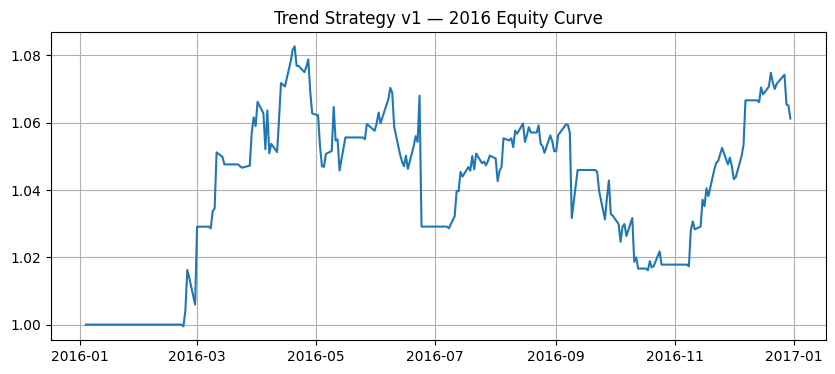

In [5]:
import matplotlib.pyplot as plt

equity = (1 + trend_out["raw_ret"]).cumprod()

plt.figure(figsize=(10,4))
plt.plot(trend_out["date"], equity)
plt.title("Trend Strategy v1 — 2016 Equity Curve")
plt.grid(True)
plt.show()
